In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings as filt



df= pd.read_excel("C:/Users/Asus/OneDrive/Masaüstü/music_genre.xlsx")
df.head()



,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,randomsayi
0,21973.0,Gaullin,Step Back,39.0,0.04510,0.874,203598.0,0.733,0.668,D,0.1330,-8.314000e+03,Major,0.0430,12503399999999900.0,4-Apr,0.231,Electronic,99992586
1,23375.0,Theory of a Deadman,All or Nothing,56.0,0.02890,0.419,210560.0,0.785,0.000,A#,0.0799,-4.483000e+16,Minor,0.0313,152053,4-Apr,0.332,Rock,99989359
2,39367.0,John Coltrane Quartet,Lonnie's Lament,39.0,0.89100,0.493,707667.0,0.233,0.108,C,0.1300,-1.587000e+01,Minor,0.0394,109101,4-Apr,0.194,Jazz,99989348
3,58969.0,empty_field,Behaving Badly,36.0,0.00229,0.430,266400.0,0.976,0.841,E,0.0906,-5.214000e+03,Minor,0.1030,19996400000000000.0,3-Apr,0.286,Jazz,99988696
4,66830.0,blink-182,Dammit,65.0,0.00166,0.407,165373.0,0.968,0.000,C,0.1310,-5.154000e+03,Major,0.1080,109727,4-Apr,0.374,Rock,99986689


In [3]:
traindf=pd.read_excel("C:/Users/Asus/OneDrive/Masaüstü/train.xlsx")
testdf=pd.read_excel("C:/Users/Asus/OneDrive/Masaüstü/test.xlsx")




In [4]:
y_train = traindf.randomsayi
traindf = traindf.drop(['randomsayi'], axis = 1)
trainIdx, testIdx = traindf.shape[0], testdf.shape[0]
df = pd.concat([traindf, testdf])
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,randomsayi
0,21973.0,Gaullin,Step Back,39.0,0.04510,0.874,203598.0,0.733,0.668,D,0.1330,-8.314000e+03,Major,0.0430,12503399999999900.0,4-Apr,0.231,Electronic,NaN
1,23375.0,Theory of a Deadman,All or Nothing,56.0,0.02890,0.419,210560.0,0.785,0.000,A#,0.0799,-4.483000e+16,Minor,0.0313,152053,4-Apr,0.332,Rock,NaN
2,39367.0,John Coltrane Quartet,Lonnie's Lament,39.0,0.89100,0.493,707667.0,0.233,0.108,C,0.1300,-1.587000e+01,Minor,0.0394,109101,4-Apr,0.194,Jazz,NaN
3,58969.0,empty_field,Behaving Badly,36.0,0.00229,0.430,266400.0,0.976,0.841,E,0.0906,-5.214000e+03,Minor,0.1030,19996400000000000.0,3-Apr,0.286,Jazz,NaN
4,66830.0,blink-182,Dammit,65.0,0.00166,0.407,165373.0,0.968,0.000,C,0.1310,-5.154000e+03,Major,0.1080,109727,4-Apr,0.374,Rock,NaN


In [5]:
df.shape

(50005, 19)

In [6]:
null_feats = pd.DataFrame(df.isnull().sum(), columns = ['NaN']).sort_values('NaN', ascending = False)
null_feats['NaN%'] = np.round(df.isnull().sum() / df.shape[0], 2)

null_feats.head()

,NaN,NaN%
randomsayi,47998,0.96
liveness,65,0.00
music_genre,65,0.00
valence,65,0.00
obtained_date,65,0.00


In [7]:
nulls = null_feats.index[:10]



In [8]:
null_feats = pd.DataFrame(df.isnull().sum(), columns = ['nans']).sort_values('nans', ascending = False)
null_feats['nans %'] = np.round(df.isnull().sum() / df.shape[0], 2)

null_feats.head()

,nans,nans %
randomsayi,47998,0.96
liveness,65,0.00
music_genre,65,0.00
valence,65,0.00
obtained_date,65,0.00


In [9]:
df = df.dropna()
print(df.isnull().sum().sort_values(ascending=False))

instance_id         0
liveness            0
music_genre         0
valence             0
obtained_date       0
tempo               0
speechiness         0
mode                0
loudness            0
key                 0
artist_name         0
instrumentalness    0
energy              0
duration_ms         0
danceability        0
acousticness        0
popularity          0
track_name          0
randomsayi          0
dtype: int64


In [10]:
df[nulls].describe()

,randomsayi,liveness,valence,speechiness,loudness
count,2.005000e+03,2005.000000,2005.000000,2005.000000,2.005000e+03
mean,1.920428e+06,0.195048,0.452313,0.096352,-1.821319e+15
std,1.114920e+06,0.162826,0.243893,0.105100,7.202663e+15
min,3.820000e+02,0.022100,0.027400,0.023300,-7.012000e+16
25%,9.520960e+05,0.098100,0.257000,0.036300,-1.449300e+04
50%,1.892638e+06,0.128000,0.439000,0.049100,-8.045000e+03
75%,2.905257e+06,0.244000,0.640000,0.104000,-4.726000e+03
max,3.868504e+06,0.984000,0.975000,0.941000,4.830000e-01


In [13]:
df[nulls] = df[nulls].fillna(df[nulls].mean())

C:\Users\Asus\AppData\Local\Temp\ipykernel_8160\941206635.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[nulls] = df[nulls].fillna(df[nulls].mean())


In [14]:
df.isnull().sum()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
randomsayi          0
dtype: int64

In [15]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,randomsayi
0,34732.0,The Marcus King Band,What's Right,27.0,0.00048,0.461,219443.0,0.929,0.024200,C,0.268,-4.859000e+03,Major,0.0428,95.23,4-Apr,0.752,Blues,3868504.0
1,38255.0,Alabama,Song of the South,65.0,0.17600,0.486,190800.0,0.633,0.000000,A,0.312,-8.414000e+03,Major,0.0365,162158,4-Apr,0.669,Rock,3865309.0
2,74720.0,Brothers Osborne,Rum,55.0,0.43000,0.829,213413.0,0.630,0.000013,D#,0.109,-6.014000e+15,Major,0.0583,121041,4-Apr,0.886,Rock,3860528.0
3,88995.0,Daft Punk,"Episode 4, Pharrell Williams",32.0,0.29700,0.635,422827.0,0.476,0.000000,F#,0.181,-1.394200e+04,Minor,0.4460,116154,4-Apr,0.600,Electronic,3858693.0
4,73060.0,Migos,Higher We Go - Intro,60.0,0.07370,0.815,255849.0,0.551,0.000000,G#,0.216,-4.048000e+03,Major,0.0936,152001,4-Apr,0.168,Rap,3858311.0


In [16]:
df.groupby('artist_name')['popularity'].mean().sort_values(ascending = False).head(10)

artist_name
Lil Pump             76.666667
Jax Jones            76.000000
Juice WRLD           76.000000
Lil Peep             76.000000
XXXTENTACION         75.750000
Jhene Aiko           75.000000
Justin Timberlake    75.000000
The Goo Goo Dolls    75.000000
Mustard              74.500000
Nicky Jam            74.000000
Name: popularity, dtype: float64

In [17]:
df[df['artist_name'] == 'Emerson, Lake & Palmer']

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,randomsayi


In [18]:
df['Solo'] = df['artist_name'].apply(lambda x : 0 if len(str(x).split('&')) > 1 else 1 )
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,randomsayi,Solo
0,34732.0,The Marcus King Band,What's Right,27.0,0.00048,0.461,219443.0,0.929,0.024200,C,0.268,-4.859000e+03,Major,0.0428,95.23,4-Apr,0.752,Blues,3868504.0,1
1,38255.0,Alabama,Song of the South,65.0,0.17600,0.486,190800.0,0.633,0.000000,A,0.312,-8.414000e+03,Major,0.0365,162158,4-Apr,0.669,Rock,3865309.0,1
2,74720.0,Brothers Osborne,Rum,55.0,0.43000,0.829,213413.0,0.630,0.000013,D#,0.109,-6.014000e+15,Major,0.0583,121041,4-Apr,0.886,Rock,3860528.0,1
3,88995.0,Daft Punk,"Episode 4, Pharrell Williams",32.0,0.29700,0.635,422827.0,0.476,0.000000,F#,0.181,-1.394200e+04,Minor,0.4460,116154,4-Apr,0.600,Electronic,3858693.0,1
4,73060.0,Migos,Higher We Go - Intro,60.0,0.07370,0.815,255849.0,0.551,0.000000,G#,0.216,-4.048000e+03,Major,0.0936,152001,4-Apr,0.168,Rap,3858311.0,1


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.inspection import permutation_importance
import eli5 
from eli5.sklearn import PermutationImportance
from pdpbox import pdp
from sklearn.ensemble import RandomForestClassifier as rfc 
import shap

def pdp_plot(col, val_x, val_y):
    val_x = val_x.select_dtypes(exclude = 'object')
    model = rfc(n_estimators = 100,random_state = 123).fit(val_x, val_y)
    isolate = pdp.pdp_isolate(model, dataset= val_x, feature = col, model_features = val_x.columns)
    pdp.pdp_plot(isolate, col);


In [21]:
def pdp_interact(cols, val_x, val_y):
    val_x = val_x.select_dtypes(exclude = 'object')
    model = rfc(n_estimators = 100,random_state = 123).fit(val_x, val_y)
    interact = pdp.pdp_interact(model, dataset= val_x, features=cols, model_features = val_x.columns)
    pdp.pdp_interact_plot(interact, cols, plot_type='contour');

In [28]:
def permImp(val_x, val_y):
    val_x = val_x.select_dtypes(exclude = 'object')
    model = rfc(n_estimators = 100,random_state = 123).fit(val_x,val_y)
    perm = PermutationImportance(model).fit(val_x, val_y)
    return eli5.show_weights(perm, feature_names = val_x.columns.tolist())

In [23]:
def force_plot(x_train, y_train, val_x):
    x_train = x_train.select_dtypes(exclude = 'object')
    val_x = val_x.select_dtypes(exclude = 'object')
   
    model = rfc(n_estimators = 100,random_state = 123).fit(x_train, y_train)
    explainer = shap.TreeExplainer(model)
    samp = val_x.sample(n = 1)
    shap_values = explainer.shap_values(samp)
    return shap.force_plot(explainer.expected_value[-1], shap_values[-1], samp)

In [24]:
def train_val_split(x, y, test_size = 0.2):
    idx = x.sample(frac = test_size).index
    x_test, y_test = x.iloc[idx], y.iloc[idx]
    x_train, y_train = x.drop(idx), y.drop(idx)
    return x_train, x_test, y_train, y_test

In [25]:
x = df.reset_index(drop = True).iloc[:trainIdx]
x_test = df.reset_index(drop = True).iloc[trainIdx: ]

In [26]:
train_x, val_x, train_y, val_y = train_val_split(x, y_train)
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((1604, 20), (401, 20), (47597,), (401,))

In [29]:
permImp(val_x,val_y)

Weight,Feature
0.0120 ± 0.0073,randomsayi
0.0110 ± 0.0060,loudness
0.0105 ± 0.0102,liveness
0.0065 ± 0.0068,speechiness
0.0065 ± 0.0075,acousticness
0.0060 ± 0.0051,valence
0.0060 ± 0.0040,popularity
0.0055 ± 0.0020,energy
0.0055 ± 0.0049,instance_id
0.0045 ± 0.0058,instrumentalness


In [402]:
from scipy.stats import norm, skew
def plot(df, rc, kind = 'dist'):
    fig, ax = plt.subplots(rc[0],rc[1])
    fig.tight_layout()
    cols = df.columns
    ind = 0
    for r in range(rc[0]):
        for c in range(rc[1]):
            if ind >= len(cols): break
            x = df[cols[ind]]
            if kind == 'dist':
                sns.distplot(x, ax = ax[r,c], fit = norm)
            elif kind == 'box':
                sns.boxplot(x, ax = ax[r, c])
            ind += 1

In [403]:
train_x.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,randomsayi,Solo
0,21973.0,Gaullin,Step Back,39.0,0.04510,0.874,203598.0,0.733,0.668,D,0.1330,-8.314000e+03,Major,0.0430,12503399999999900.0,4-Apr,0.231,Electronic,1.920081e+06,1
1,23375.0,Theory of a Deadman,All or Nothing,56.0,0.02890,0.419,210560.0,0.785,0.000,A#,0.0799,-4.483000e+16,Minor,0.0313,152053,4-Apr,0.332,Rock,1.920081e+06,1
2,39367.0,John Coltrane Quartet,Lonnie's Lament,39.0,0.89100,0.493,707667.0,0.233,0.108,C,0.1300,-1.587000e+01,Minor,0.0394,109101,4-Apr,0.194,Jazz,1.920081e+06,1
3,58969.0,empty_field,Behaving Badly,36.0,0.00229,0.430,266400.0,0.976,0.841,E,0.0906,-5.214000e+03,Minor,0.1030,19996400000000000.0,3-Apr,0.286,Jazz,1.920081e+06,1
4,66830.0,blink-182,Dammit,65.0,0.00166,0.407,165373.0,0.968,0.000,C,0.1310,-5.154000e+03,Major,0.1080,109727,4-Apr,0.374,Rock,1.920081e+06,1


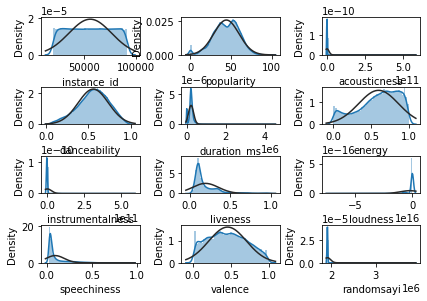

In [404]:
feats = [c for c in train_x.select_dtypes(exclude = 'object').columns if train_x[c].nunique() >= 10]
plot(train_x[feats], [4,3])

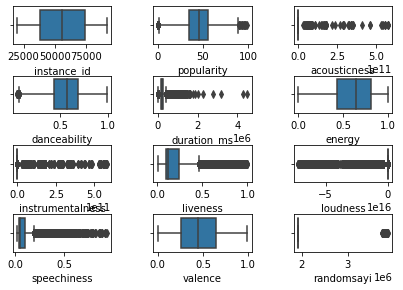

In [405]:
plot(train_x[feats], [4,3], 'box')

In [406]:
def skew_score(df) : 
    df = df.select_dtypes(exclude = 'object')
    return pd.DataFrame(np.abs(skew(df)), index = df.columns, columns = ['skew_score']).sort_values('skew_score', ascending = False)

In [407]:
skews = skew_score(train_x)
high_skew_feats = skews[skews.skew_score > 0.5].index
skews[skews.skew_score > 0.5]

,skew_score
acousticness,33.445964
randomsayi,27.131389
instrumentalness,13.495509
Solo,8.460072
loudness,5.543984
duration_ms,3.924956
speechiness,2.467904
liveness,2.246204
energy,0.571728


In [408]:
train_artist_name, val_artist_name = train_x['artist_name'], val_x['artist_name']  
train_song_name, val_song_name = train_x['track_name'], val_x['track_name']  
feats_to_drop = ['artist_name', 'track_name']
train_x = train_x.drop(feats_to_drop, axis = 1)
val_x = val_x.drop(feats_to_drop, axis = 1)

In [409]:
train_x.head()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,randomsayi,Solo
0,21973.0,39.0,0.04510,0.874,203598.0,0.733,0.668,D,0.1330,-8.314000e+03,Major,0.0430,12503399999999900.0,4-Apr,0.231,Electronic,1.920081e+06,1
1,23375.0,56.0,0.02890,0.419,210560.0,0.785,0.000,A#,0.0799,-4.483000e+16,Minor,0.0313,152053,4-Apr,0.332,Rock,1.920081e+06,1
2,39367.0,39.0,0.89100,0.493,707667.0,0.233,0.108,C,0.1300,-1.587000e+01,Minor,0.0394,109101,4-Apr,0.194,Jazz,1.920081e+06,1
3,58969.0,36.0,0.00229,0.430,266400.0,0.976,0.841,E,0.0906,-5.214000e+03,Minor,0.1030,19996400000000000.0,3-Apr,0.286,Jazz,1.920081e+06,1
4,66830.0,65.0,0.00166,0.407,165373.0,0.968,0.000,C,0.1310,-5.154000e+03,Major,0.1080,109727,4-Apr,0.374,Rock,1.920081e+06,1


<AxesSubplot:xlabel='energy', ylabel='loudness'>

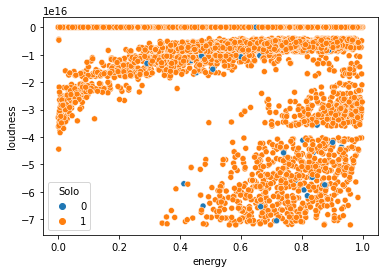

In [410]:
sns.scatterplot(data = train_x, x = 'energy', y ='loudness', hue = 'Solo')

<AxesSubplot:xlabel='energy', ylabel='instrumentalness'>

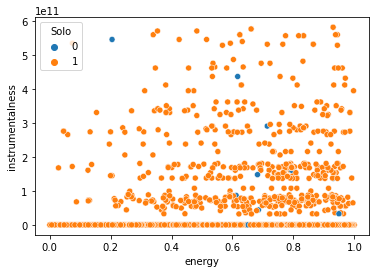

In [411]:
sns.scatterplot(data = train_x, x = 'energy', y ='instrumentalness', hue = 'Solo')

<AxesSubplot:xlabel='mode', ylabel='instrumentalness'>

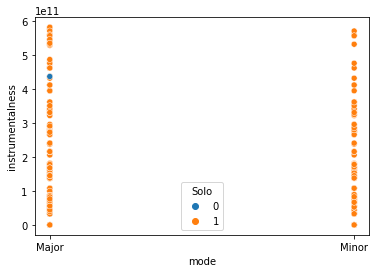

In [412]:
sns.scatterplot(data = train_x, x = 'mode', y ='instrumentalness', hue = 'Solo')

<AxesSubplot:xlabel='mode', ylabel='valence'>

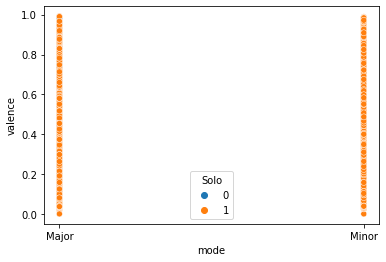

In [413]:
sns.scatterplot(data = train_x, x = 'mode', y ='valence', hue = 'Solo')

<AxesSubplot:xlabel='mode', ylabel='popularity'>

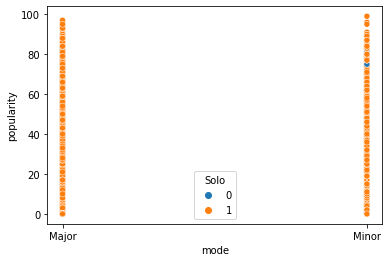

In [414]:
sns.scatterplot(data = train_x, x = 'mode', y ='popularity', hue = 'Solo')

<AxesSubplot:xlabel='valence', ylabel='popularity'>

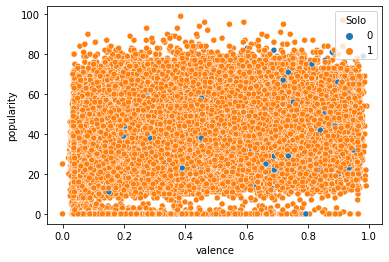

In [415]:
sns.scatterplot(data = train_x, x = 'valence', y ='popularity', hue = 'Solo')

<AxesSubplot:xlabel='duration_ms', ylabel='popularity'>

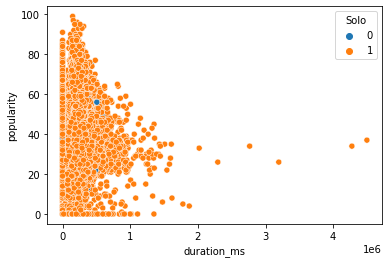

In [416]:
sns.scatterplot(data = train_x, x = 'duration_ms', y ='popularity', hue = 'Solo')

In [417]:
from sklearn.linear_model import LogisticRegression as lrr
from sklearn.ensemble import RandomForestClassifier as rfc 
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.svm import SVC
from xgboost import XGBRFClassifier as xgb 

from sklearn.model_selection import cross_val_score as cvs, GridSearchCV as gscv, StratifiedKFold as skf
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms, RobustScaler as rs


In [418]:
def best_model(xt, yt, scaler = None):
    models = [lrr(), SVC(), rfc(), gnb(), xgb()]
    names = ['logistic regression','svm','random forest clf', 'naive bayes', 'xgboost']
    scores = []
    for model in models:
        if scaler == 'std':
            model = Pipeline(steps = [('std',ss()),('model',model)])
        elif scaler == 'robust':
            model = Pipeline(steps = [('robust',rs()),('model',model)])
        elif scaler == 'mms':
            model = Pipeline(steps = [('mms',mms()),('model',model)])
        cv = skf(n_splits = 2, shuffle = True, random_state = True)
        score = cvs(model, cv = cv, X = xt, y = yt, scoring = 'f1_micro').mean()
      
        scores.append(score)
    return pd.DataFrame(score, index = names, columns = ['f1_score']).sort_values('f1_score', ascending = True)

def get_score(xt, yt, model = lrr(), scaler = None):
    if scaler == 'std':
        model = Pipeline(steps = [('std',ss()),('model',model)])
    elif scaler == 'robust':
        model = Pipeline(steps = [('robust',rs()),('model',model)])
    elif scaler == 'mms':
        model = Pipeline(steps = [('mms',mms()),('model',model)])
    cv = skf(n_splits = 2, shuffle = True, random_state = True)
    auc = cvs(model, cv = cv, X = xt, y = yt).mean()
    print(f"Model score :==> {auc}")
    
def gridCv(xt, yt, model, params, scaler = None):
    if scaler == 'std':
        model = Pipeline(steps = [('std',ss()),('model',model)])
    elif scaler == 'robust':
        model = Pipeline(steps = [('robust',rs()),('model',model)])
    elif scaler == 'mms':
        model = Pipeline(steps = [('mms',mms()),('model',model)])
    skcv = skf(n_splits = 2, shuffle = True, random_state = True)
    cv = gscv(model, param_grid = params, cv = skcv , return_train_score = True)
    cv.fit(xt,yt)
    results = pd.DataFrame(cv.cv_results_).sort_values('mean_test_score', ascending = False)
    results = results[['mean_test_score','mean_train_score','params']]
    best_params = cv.best_params_
    best_est = cv.best_estimator_
    return best_est, best_params, results

def clf_report(yt, pred):
    print(classification_report(yt, pred))

In [423]:
null_feats = pd.DataFrame(df.isnull().sum(), columns = ['nans']).sort_values('nans', ascending = False) 
null_feats['nans %'] = np.round(df.isnull().sum() / df.shape[0], 2) 
 
df = df.dropna() 
print(df.isnull().sum().sort_values(ascending=False))

instance_id         0
artist_name         0
randomsayi          0
music_genre         0
valence             0
obtained_date       0
tempo               0
speechiness         0
mode                0
loudness            0
liveness            0
key                 0
instrumentalness    0
energy              0
duration_ms         0
danceability        0
acousticness        0
popularity          0
track_name          0
Solo                0
dtype: int64


In [424]:
best_model(train_x, train_y)

,f1_score
logistic regression,NaN
svm,NaN
random forest clf,NaN
naive bayes,NaN
xgboost,NaN


In [420]:
best_model(train_x, train_y, 'std')

,f1_score
logistic regression,NaN
svm,NaN
random forest clf,NaN
naive bayes,NaN
xgboost,NaN


In [201]:
best_model(train_x, train_y, 'robust')

,f1_score
logistic regression,NaN
svm,NaN
random forest clf,NaN
naive bayes,NaN
xgboost,NaN


In [202]:
best_model(train_x, train_y, 'mms')

,f1_score
logistic regression,NaN
svm,NaN
random forest clf,NaN
naive bayes,NaN
xgboost,NaN


,f1_score
logistic regression,NaN
svm,NaN
random forest clf,NaN
naive bayes,NaN
xgboost,NaN
